In [ ]:
import pandas as pd
url = "/content/spam.csv"
data = pd.read_csv(url, encoding='latin-1')

In [ ]:
print(data.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
print(data.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [ ]:
# Select only the relevant columns
data = data[['v1', 'v2']]

# Rename columns for consistency
data.columns = ['label', 'message']

# Check for missing values in the dataset
print("\nMissing values in each column:")
print(data.isnull().sum())

# Drop rows with missing values in 'label' or 'message' columns
data.dropna(subset=['label', 'message'], inplace=True)

# Ensure all messages are strings
data['message'] = data['message'].astype(str)

# Check the size of the dataset after preprocessing
print("\nDataset size after dropping missing values:", data.shape)

# Display the first few rows to ensure the data is correct
print(data.head())



Missing values in each column:
label      0
message    0
dtype: int64

Dataset size after dropping missing values: (5572, 2)
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


<ipython-input-13-3d47ee8880f8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['label', 'message'], inplace=True)
<ipython-input-13-3d47ee8880f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['message'] = data['message'].astype(str)


In [ ]:
from sklearn.model_selection import train_test_split

# Encode the labels
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size=0.2, random_state=42)

# Display the size of the training and testing sets
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (4457,)
Testing set size: (1115,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Display the shape of the transformed data
print("Shape of TF-IDF training data:", X_train_tfidf.shape)
print("Shape of TF-IDF testing data:", X_test_tfidf.shape)


Shape of TF-IDF training data: (4457, 7472)
Shape of TF-IDF testing data: (1115, 7472)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    matrix = confusion_matrix(y_test, y_pred)
    return accuracy, report, matrix

# Train and evaluate Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_accuracy, nb_report, nb_matrix = evaluate_model(nb_model, X_test_tfidf, y_test)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Report:\n", nb_report)
print("Naive Bayes Confusion Matrix:\n", nb_matrix)

# Train and evaluate Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_accuracy, lr_report, lr_matrix = evaluate_model(lr_model, X_test_tfidf, y_test)
print("\nLogistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Report:\n", lr_report)
print("Logistic Regression Confusion Matrix:\n", lr_matrix)

# Train and evaluate SVM
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)
svm_accuracy, svm_report, svm_matrix = evaluate_model(svm_model, X_test_tfidf, y_test)
print("\nSVM Accuracy:", svm_accuracy)
print("SVM Report:\n", svm_report)
print("SVM Confusion Matrix:\n", svm_matrix)


Naive Bayes Accuracy: 0.9668161434977578
Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Naive Bayes Confusion Matrix:
 [[965   0]
 [ 37 113]]

Logistic Regression Accuracy: 0.9524663677130045
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Logistic Regression Confusion Matrix:
 [[962   3]
 [ 50 100]]

SVM Accuracy: 0.9766816143497757
SVM Report:
               precision    recall  f1-scor

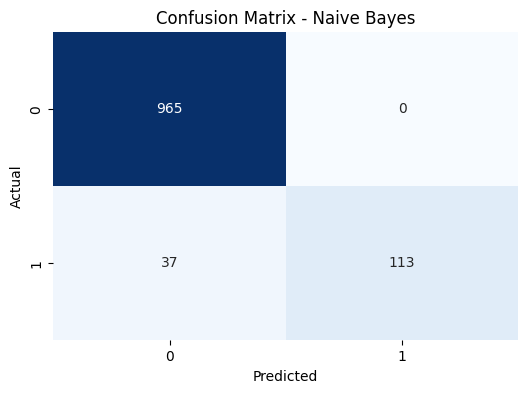

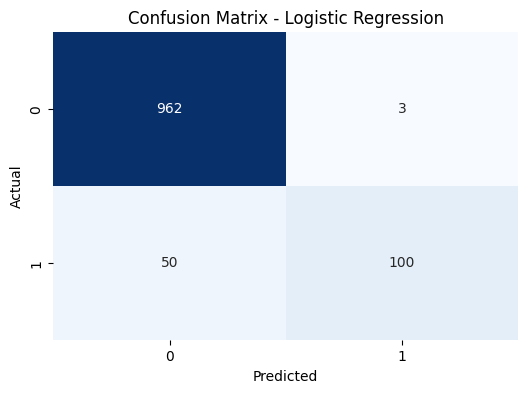

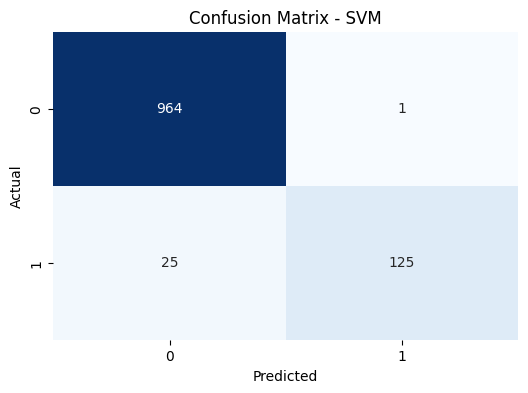

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(nb_matrix, 'Naive Bayes')
plot_confusion_matrix(lr_matrix, 'Logistic Regression')
plot_confusion_matrix(svm_matrix, 'SVM')


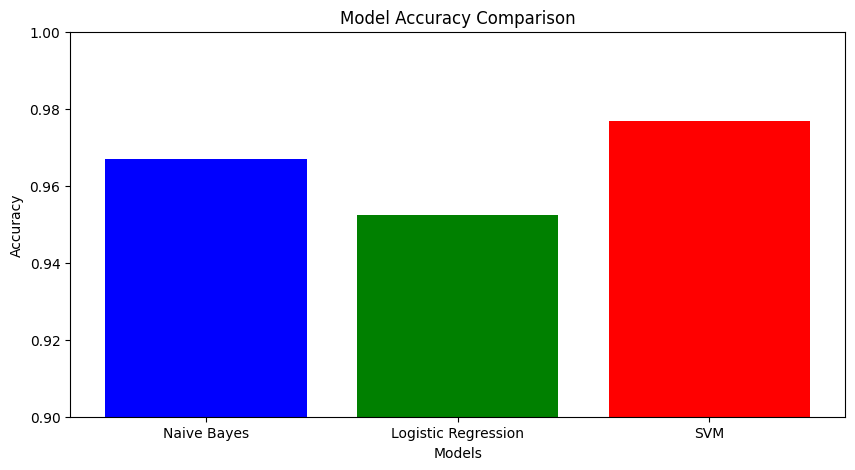

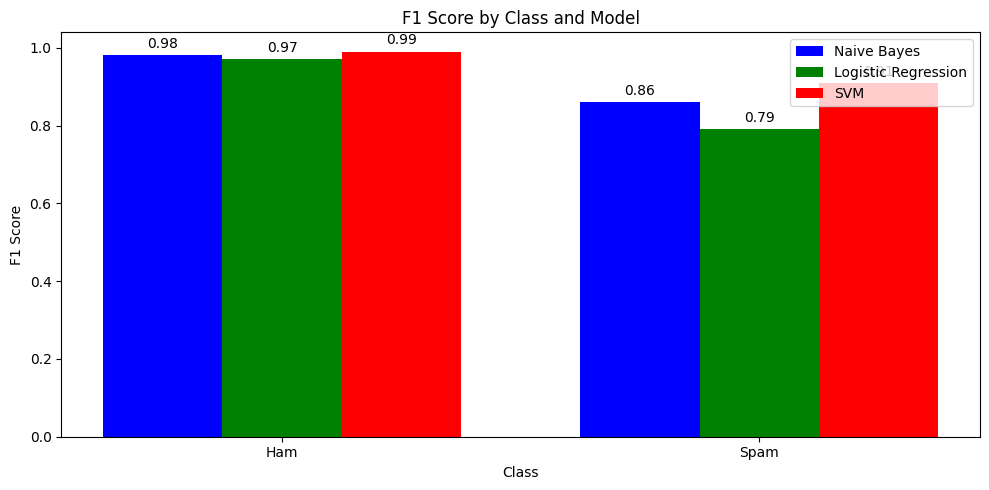

In [ ]:
import numpy as np

# Accuracy scores
accuracy_scores = [nb_accuracy, lr_accuracy, svm_accuracy]
models = ['Naive Bayes', 'Logistic Regression', 'SVM']

# Plotting accuracy scores
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1.0)  # Setting y-axis limit for better comparison
plt.show()

# F1 scores
nb_f1_score = [0.98, 0.86]  # ham, spam
lr_f1_score = [0.97, 0.79]  # ham, spam
svm_f1_score = [0.99, 0.91]  # ham, spam

labels = ['Ham', 'Spam']
x = np.arange(len(labels))  # label locations
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width, nb_f1_score, width, label='Naive Bayes', color='blue')
rects2 = ax.bar(x, lr_f1_score, width, label='Logistic Regression', color='green')
rects3 = ax.bar(x + width, svm_f1_score, width, label='SVM', color='red')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Class')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score by Class and Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels to the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

fig.tight_layout()
plt.show()
